# **Visualización de Campos Vectoriales**

Erick Becerra Marín <br>
Daniel López López 

---
---

### **Bibliotecas, Funciones y Parámetros**

In [1]:
import numpy as np
import sympy as sp
from sympy.abc import x, y
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

%matplotlib inline

plt.rcParams['figure.figsize'] = [11, 7]  # Aumenta el tamaño de las figuras.
plt.rcParams['figure.dpi'] = 100

def apply_transformation(vec, matrx):
    v = matrx.dot(vec)
    return v[0], v[1]


---

### **Definición del Campo**

Aquí puedes ingresar el campo vectorial y modificar los intervalos en los que se graficarán los resultados. 
***Nota***. Para cualquier función que necesites en la definición del campo ($\cos x$, $\sqrt{x}$, etc.), utiliza la versión de la biblioteca `SymPy`. Para ello escribe `sp.tu_función()`. 

In [2]:
vx = sp.cos(4*x) * sp.sin(y)     # Definición del campo en X            
vy = sp.cos(y) * sp.sin(2*x)     # Definición del campo en Y


# Intervalo del campo vectorial. El tercer número corresponde al número de valores generados entre los 
# límites del intervalo.
    
X, Y = np.meshgrid(np.linspace(-10, 10, 20),              # Intervalo del campo vectorial
                   np.linspace(-10, 10, 20))

# Intervalo de la divergencia. Se recomienda ingresar una cantidad de puntos mucho mayor, 
# esto para obtener un mapa de color nítido.

X_div, Y_div = np.meshgrid(np.linspace(-10, 10, 1000),     
                           np.linspace(-10, 10, 1000))    

# Intervalo de las derivadas parciales

dom = np.linspace(-10, 10, 1000)

### **Seleccionar Transformación**

Aquí puedes seleccionar la transformación que deseas aplicar. También puedes especificar un factor de expansión `k` para alargar o acortar los vectores al aplicar la transformacion; si no deseas alterar la escala, introduce `k = 1`.

- Si es una rotación, corre la primera celda tras ingresar el ángulo de rotación en radianes. U(tiliza la clase `pi` del módulo `SymPy` en tu ángulo; para ello escribe `sp.pi`).
- Si es una reflexión, corre la segunda celda tras ingresar el valor de la pendiente de la recta $y=mx$
- Si quieres usar otra matriz, corre la tercera celda tras ingresar tus valores directamente en el `np.array()`.

In [3]:
ang = sp.pi / 4         # Ángulo de rotación en radianes
k = 1                   # Factor de expansión
    
matrx = np.array([[k*sp.cos(ang), -k*sp.sin(ang)],
                  [k*sp.sin(ang), k*sp.cos(ang)]])

In [3]:
# Reflexión

m = 2                   # Pendiente de la recta            
k = 1                   # Factor de expansión

ang = sp.atan(m)
    
matrx = np.array([[k*sp.cos(2*ang), k*sp.sin(2*ang)],
                  [k*sp.sin(2*ang), -k*sp.cos(2*ang)]])

In [44]:
# Otra

matrx = np.array([[42, 2.716544],       # Ingresa tus valores
                  [-3.141592, 7]])

---

### **Cálculo de Resultados**

In [4]:
# Campos Vectoriales

field = np.array([vx, vy])

# Funciones para evaluar el campo original
fx = sp.lambdify([x, y], vx, 'numpy')
fy = sp.lambdify([x, y], vy, 'numpy')

# Funciones para evaluar el campo transformado
vx_t, vy_t = apply_transformation(field, matrx)
field_t = [vx_t, vy_t]
fx_t = sp.lambdify([x, y], vx_t, 'numpy')
fy_t = sp.lambdify([x, y], vy_t, 'numpy')

VX = fx(X, Y)       # Campo original en x
VY = fy(X, Y)       # Campo original en y
U = fx_t(X, Y)      # Campo transformado en x
V = fy_t(X, Y)      # Campo transformado en y

##################################################################

# Derivadas parciales
dx = sp.diff(vx, x)              # Forma simbólica
dy = sp.diff(vy, y)
dx_t = sp.diff(vx_t, x)
dy_t = sp.diff(vy_t, y)

eval_dx = sp.lambdify([x, y], dx, 'numpy')
eval_dy = sp.lambdify([x, y], dy, 'numpy')
eval_dx_t = sp.lambdify([x, y], dx_t, 'numpy')
eval_dy_t = sp.lambdify([x, y], dy_t, 'numpy')


# Si la variable respecto a la que se toma la parcial no aparece en la expresión final de la derivada, 
# la expresión es constante para cualquier número en el que fijemos la variable restante. Por simplicidad,
# cuando esto ocurre, las derivadas no se grafican.

DX = eval_dx(dom, 1)          # y fija en 1
DY = eval_dy(1, dom)          # x fija en 1
DX_t = eval_dx_t(dom, 1)      # y fija en 1
DY_t = eval_dy_t(1, dom)      # x fija en 1


# Divergencia
div = dx + dy
div_t = dx_t + dy_t

eval_div = sp.lambdify([x, y], div, 'numpy')
eval_div_t = sp.lambdify([x, y], div_t, 'numpy')


Z = eval_div(X_div, Y_div)     
Z_t = eval_div_t(X_div, Y_div)  

# Resultados en forma simbólica

print(f"""
Campo transformado: 
F_t(x, y) = {field_t}

Divergencia original: 
∇⋅F = {div}

Nueva divergencia: 
∇⋅F_t = {div_t}

Derivadas parciales originales:
∂F_x / ∂x = {dx}
∂F_y / ∂y = {dy}

Nuevas derivadas parciales:
∂F_tx / ∂x = {dx_t}
∂F_ty / ∂y = {dy_t}
""")



Campo transformado: 
F_t(x, y) = [sin(2*x)*sin(2*atan(2))*cos(y) + sin(y)*cos(4*x)*cos(2*atan(2)), -sin(2*x)*cos(y)*cos(2*atan(2)) + sin(y)*sin(2*atan(2))*cos(4*x)]

Divergencia original: 
∇⋅F = -sin(2*x)*sin(y) - 4*sin(4*x)*sin(y)

Nueva divergencia: 
∇⋅F_t = sin(2*x)*sin(y)*cos(2*atan(2)) - 4*sin(4*x)*sin(y)*cos(2*atan(2)) + 2*sin(2*atan(2))*cos(2*x)*cos(y) + sin(2*atan(2))*cos(4*x)*cos(y)

Derivadas parciales originales:
∂F_x / ∂x = -4*sin(4*x)*sin(y)
∂F_y / ∂y = -sin(2*x)*sin(y)

Nuevas derivadas parciales:
∂F_tx / ∂x = -4*sin(4*x)*sin(y)*cos(2*atan(2)) + 2*sin(2*atan(2))*cos(2*x)*cos(y)
∂F_ty / ∂y = sin(2*x)*sin(y)*cos(2*atan(2)) + sin(2*atan(2))*cos(4*x)*cos(y)



---

### **Graficación de Valores Obtenidos**

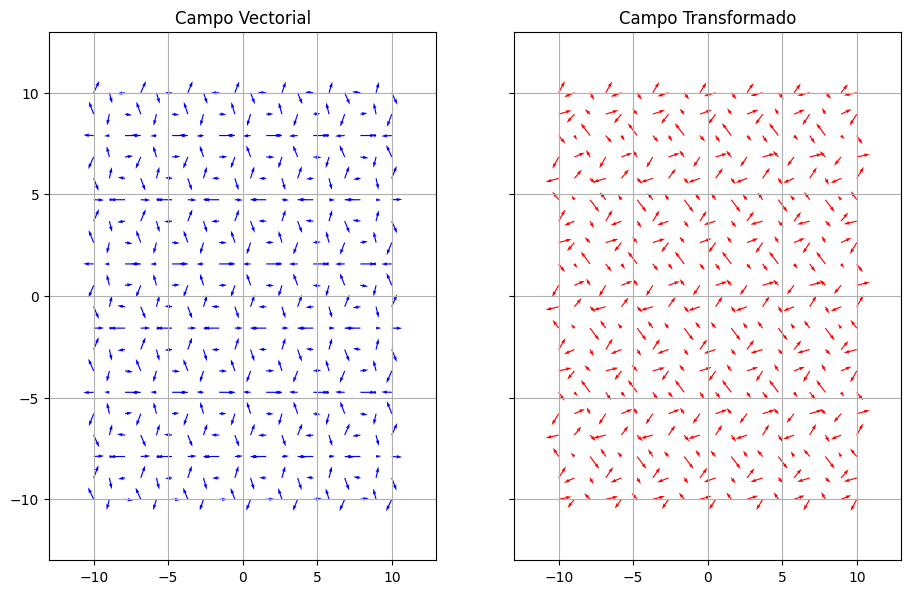

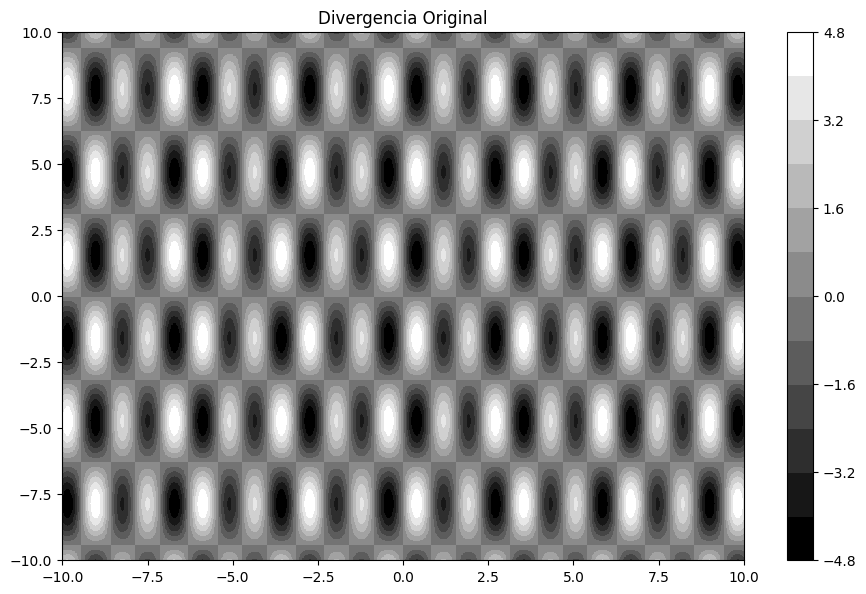

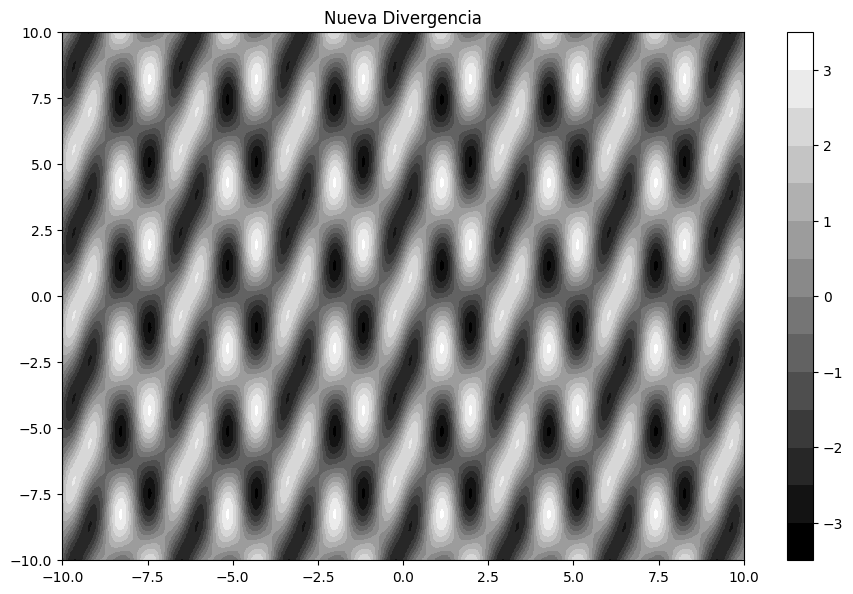

In [5]:
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Campos Vectoriales

ax1.quiver(X, Y, VX, VY, color='b')
ax1.set_title('Campo Vectorial')

ax1.set_xlim(-13, 13)
ax1.set_ylim(-13, 13)
ax1.grid()

ax2.quiver(X, Y, U, V, color='r')
ax2.set_title('Campo Transformado')

ax2.set_xlim(-13, 13)
ax2.set_ylim(-13, 13)
ax2.grid()

# Divergencia

# Si la divergencia es contante, no se grafica por simplicidad. Para eso el bloque try/except.

#Divergencia Original
try:
    levels = MaxNLocator(nbins=15).tick_values(Z.min(), Z.max())
    norm = BoundaryNorm(levels, ncolors=cm.gray.N, clip=True)
    
except AttributeError:
    print("La divergencia original es constante.")
    
else:
    fig2, ax3 = plt.subplots()

    div = ax3.pcolormesh(X_div, Y_div, Z, cmap = cm.gray, shading='auto', norm=norm)
    ax3.set_title('Divergencia Original') 
    fig2.colorbar(div, ax=ax3)
    
# Nueva divergencia   
try: 
    levels_t = MaxNLocator(nbins=15).tick_values(Z_t.min(), Z_t.max())
    norm_t = BoundaryNorm(levels_t, ncolors=cm.gray.N, clip=True)

except AttributeError:
    print("La divergencia del campo transformado es constante.")
    
else:
    fig3, ax4 = plt.subplots()

    div_t = ax4.pcolormesh(X_div, Y_div, Z_t, cmap = cm.gray, shading='auto', norm=norm_t)
    ax4.set_title('Nueva Divergencia')
    fig3.colorbar(div_t, ax=ax4)
    
plt.show()

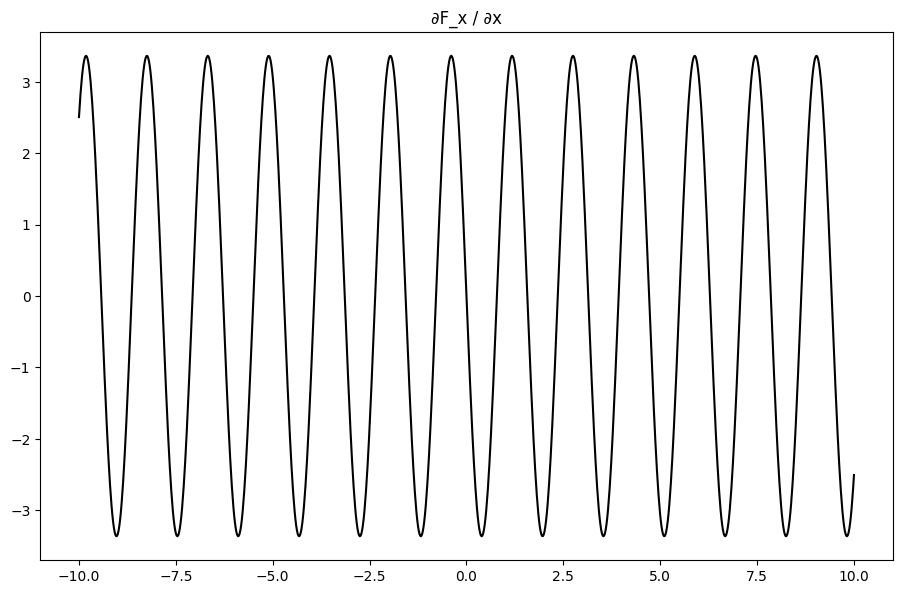

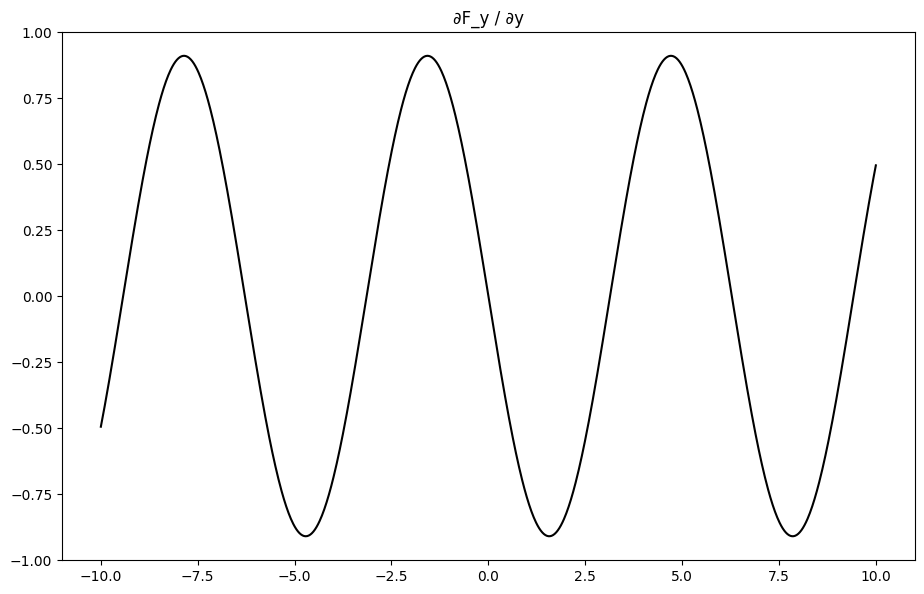

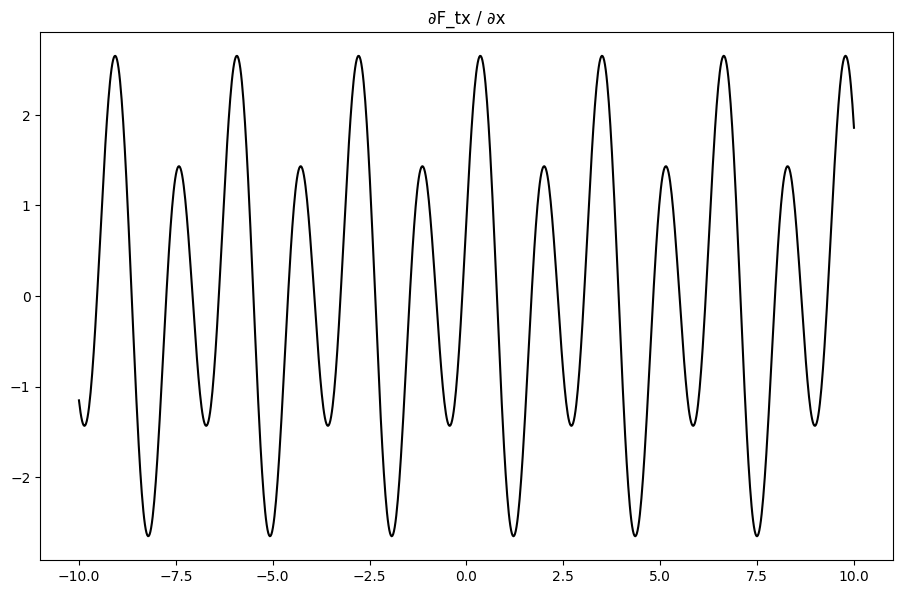

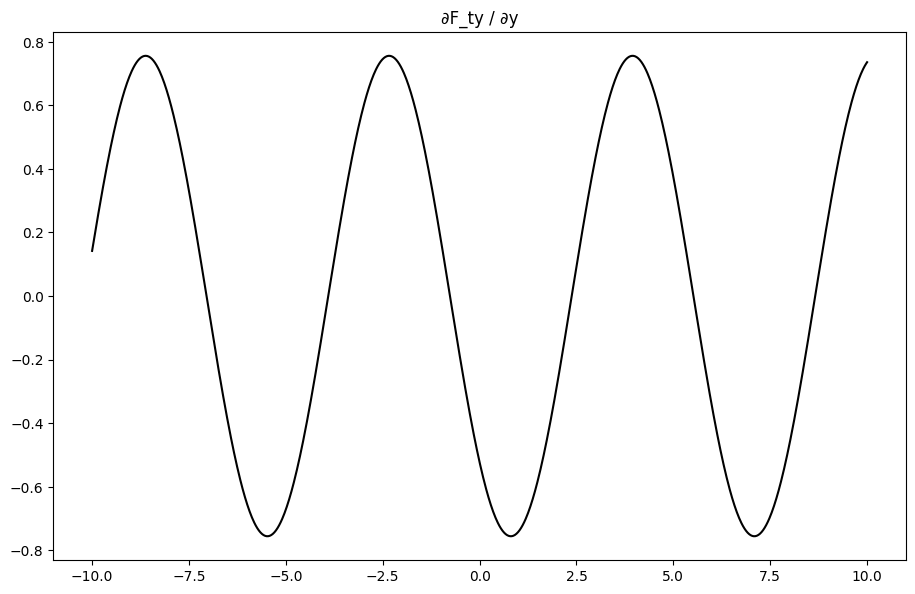

In [6]:
fig4, ax5 = plt.subplots()
fig5, ax6 = plt.subplots()
fig6, ax7 = plt.subplots()
fig7, ax8 = plt.subplots()

# Si la variable respecto a la que se toma la parcial no aparece en la expresión final de la derivada, 
# la expresión es constante para cualquier número en el que fijemos la variable restante. Por simplicidad,
# cuando esto ocurre, las derivadas no se grafican.

try:
    ax5.plot(dom, DX, color='black')
    ax5.set_title('∂F_x / ∂x')
except ValueError:
    print(f"La derivada ∂F_x / ∂x produce una gráfica constante (No está en términos de 'x')")

try:    
    ax6.plot(dom, DY, color='black')
    ax6.set_title('∂F_y / ∂y')

except ValueError:
    print("La derivada ∂F_y / ∂y produce una gráfica constante(No está en términos de 'y')")

    
try:
    ax7.plot(dom, DX_t, color='black')
    ax7.set_title('∂F_tx / ∂x')

except ValueError:
    print("La derivada ∂F_tx / ∂x produce una gráfica constante (No está en términos de 'x')")

    
try:
    ax8.plot(dom, DY_t, color='black')
    ax8.set_title('∂F_ty / ∂y')

except ValueError:
    print("La derivada ∂F_ty / ∂y produce una gráfica constante (No está en términos de 'y')")

plt.show()